The project path "projects/single/finaldatabm_gender-1.arff/20210809_215521/" is created.
data_streams/metabolomites-20210808/FinalDataBM_gender-1.arff
Reading line 766 
100.00% of instances are prequentially processed!
The stream is completely processed.
PR + FHDDM: 
	Classifier Error-rate: 40.30%
	Classifier Average Memory Usage (bytes): 145224.00
	Classifier Average Runtime (ms): 123.84
	Classifier Total Runtime (ms): 304.98
	Average Detection Memory Usage (bytes): 1768.00,
	Average Detection Runtime (ms): 0.83,
	Total Detection Runtime (ms): 2.25,
	Error-rate: 40.30
	Drift Points detected: [215]
THE END!

data_streams/metabolomites-20210808/FinalDataBM_gender-1.arff
Reading line 766 
100.00% of instances are prequentially processed!
The stream is completely processed.
PR + FHDDMS: 
	Classifier Error-rate: 41.44%
	Classifier Average Memory Usage (bytes): 145256.00
	Classifier Average Runtime (ms): 72.71
	Classifier Total Runtime (ms): 307.63
	Average Detection Memory Usage (bytes):

/var/tmp/xbajger/pv056-task2/plotter/performance_plotter.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


THE END!

data_streams/metabolomites-20210808/FinalDataBM_bcp-1.arff
Reading line 526 
100.00% of instances are prequentially processed!
The stream is completely processed.
PR + FHDDMS: 
	Classifier Error-rate: 33.11%
	Classifier Average Memory Usage (bytes): 145224.00
	Classifier Average Runtime (ms): 131.86
	Classifier Total Runtime (ms): 171.09
	Average Detection Memory Usage (bytes): 1944.00,
	Average Detection Runtime (ms): 5.77,
	Total Detection Runtime (ms): 12.88,
	Error-rate: 33.11
	Drift Points detected: [227]
THE END!

data_streams/metabolomites-20210808/FinalDataBM_bcp-1.arff
Reading line 526 
100.00% of instances are prequentially processed!
The stream is completely processed.
PR + CUSUM: 
	Classifier Error-rate: 34.47%
	Classifier Average Memory Usage (bytes): 145224.00
	Classifier Average Runtime (ms): 171.44
	Classifier Total Runtime (ms): 171.44
	Average Detection Memory Usage (bytes): 896.00,
	Average Detection Runtime (ms): 7.02,
	Total Detection Runtime (ms): 7.02

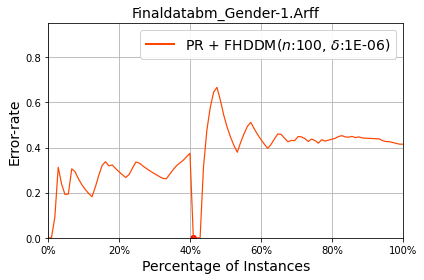

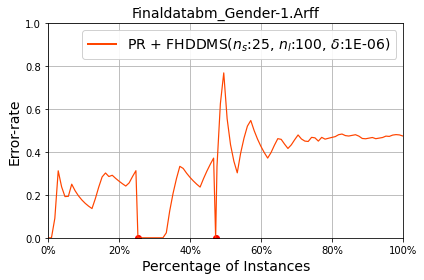

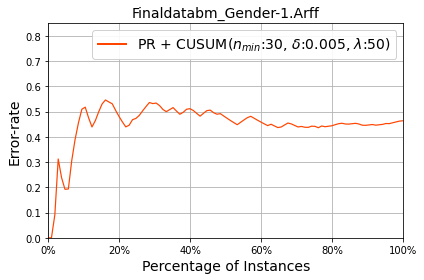

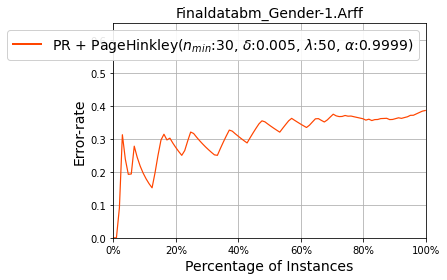

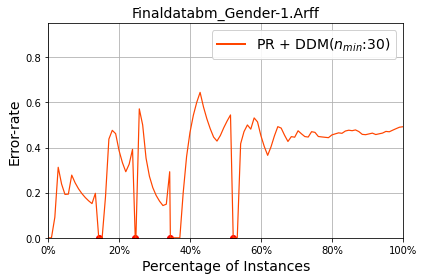

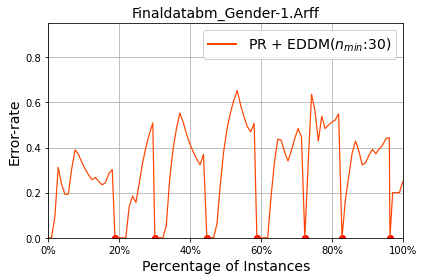

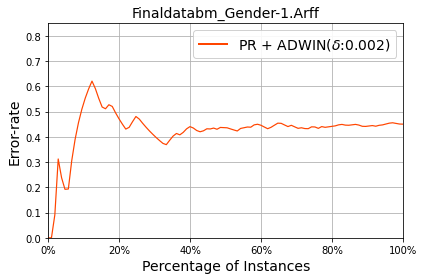

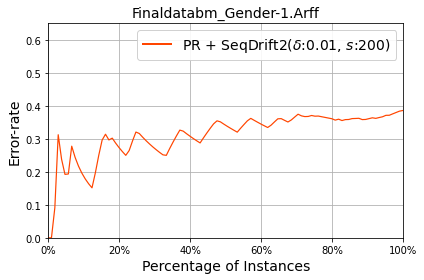

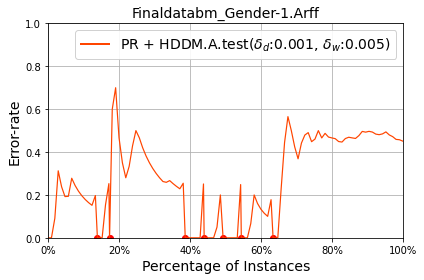

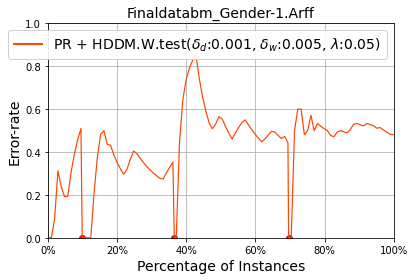

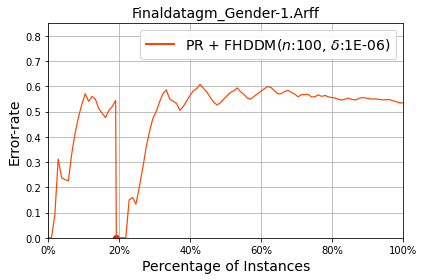

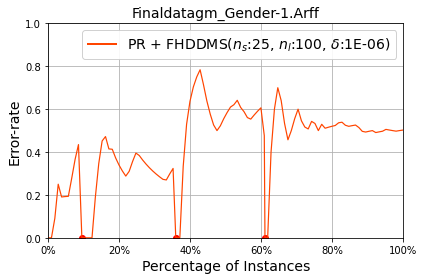

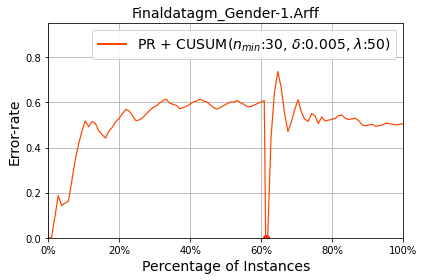

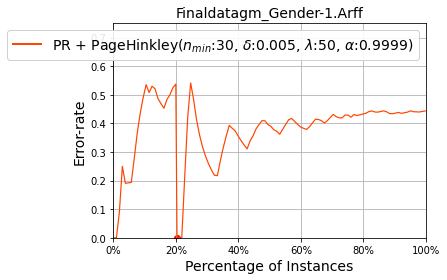

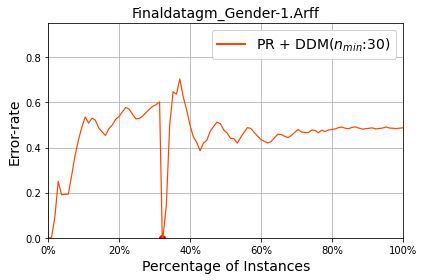

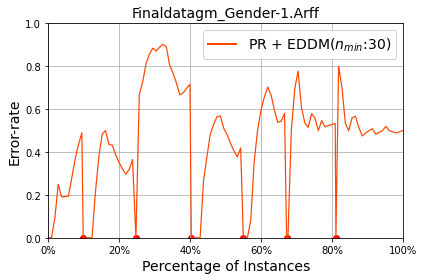

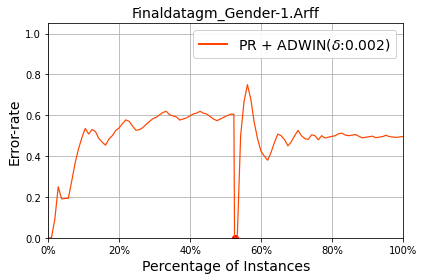

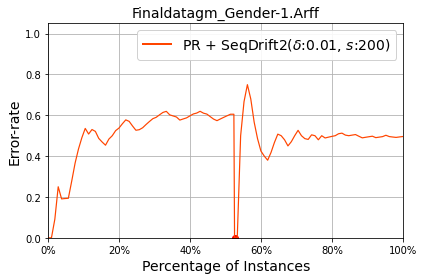

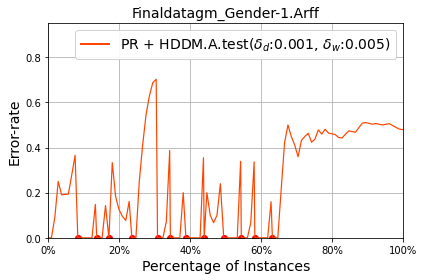

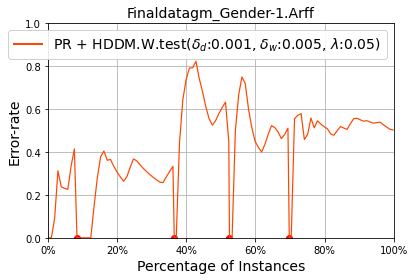

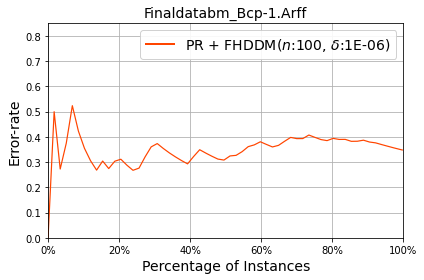

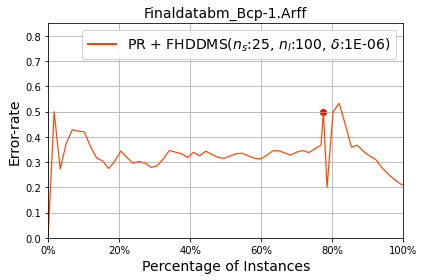

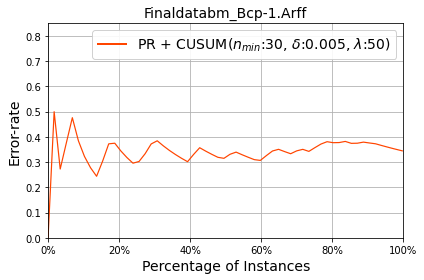

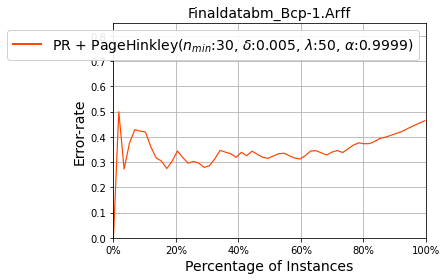

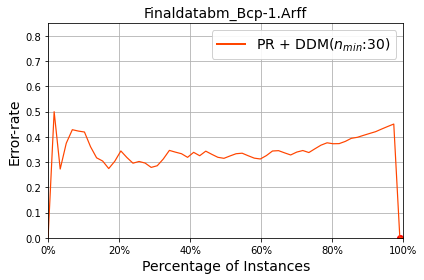

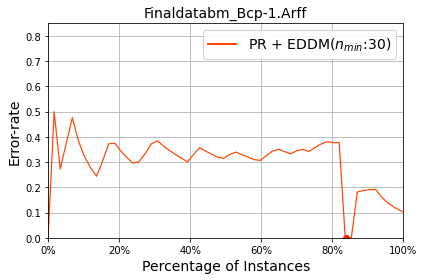

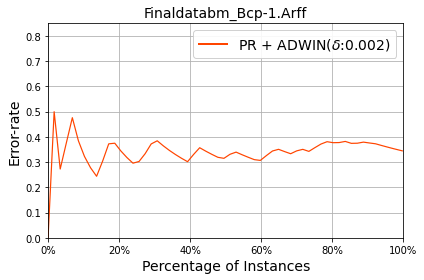

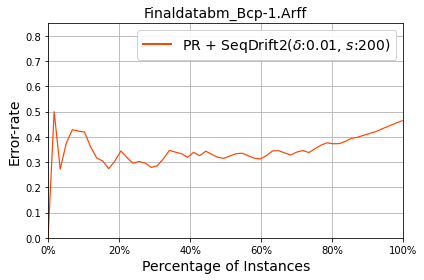

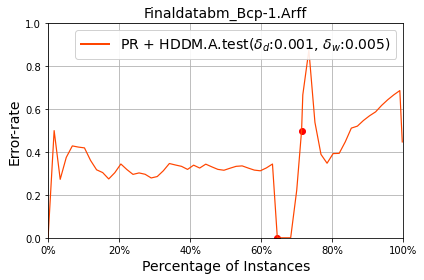

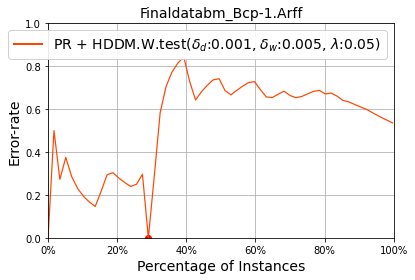

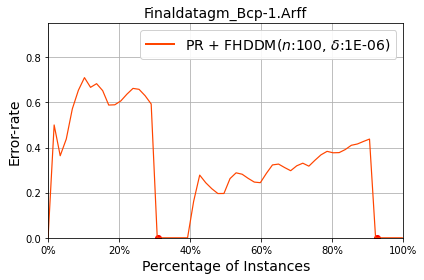

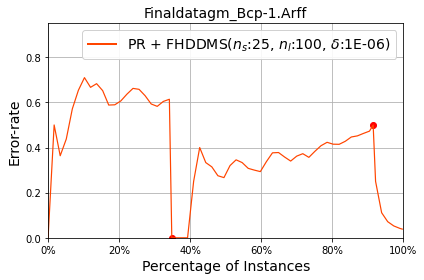

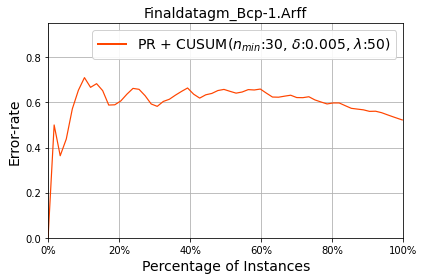

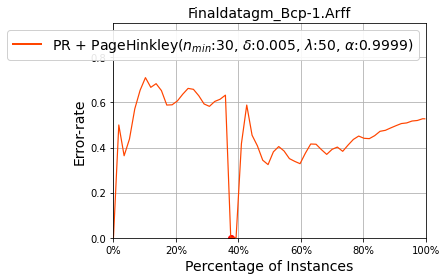

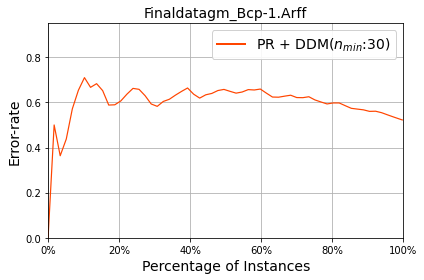

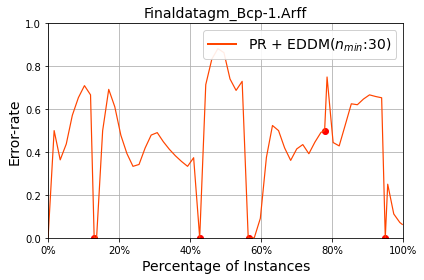

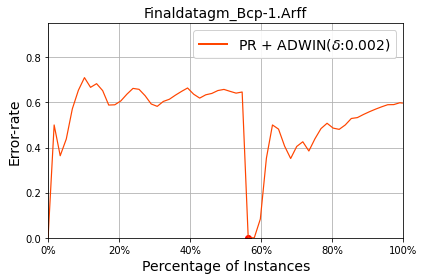

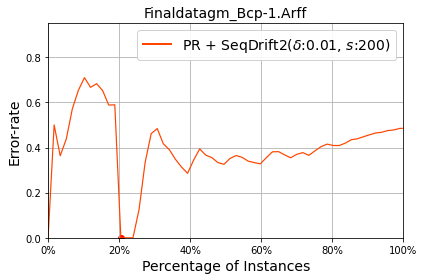

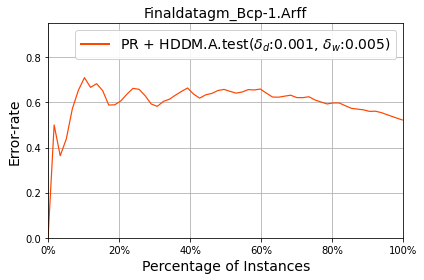

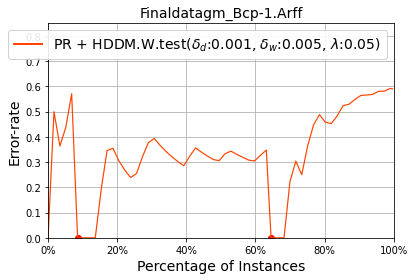

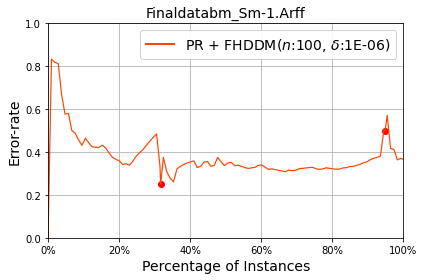

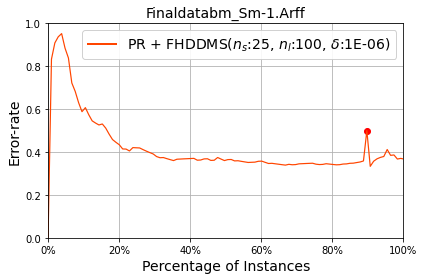

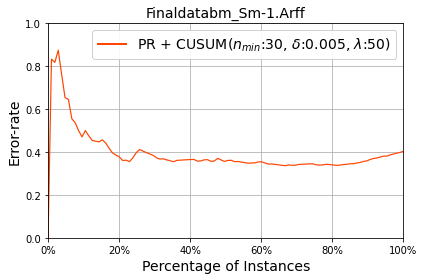

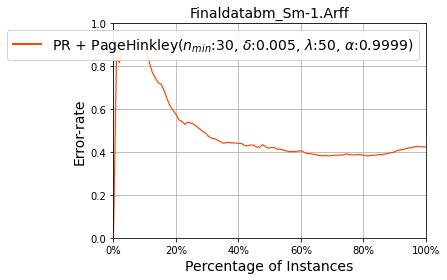

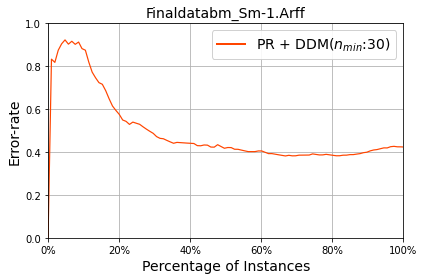

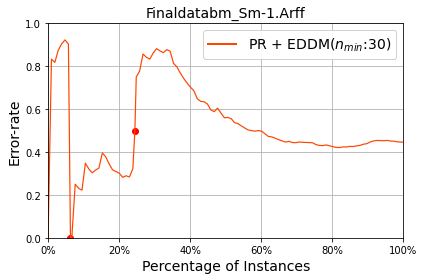

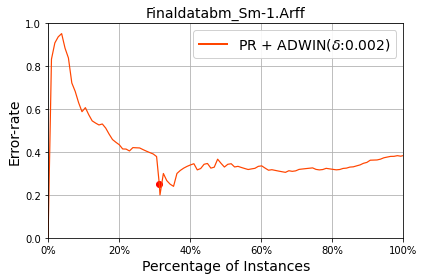

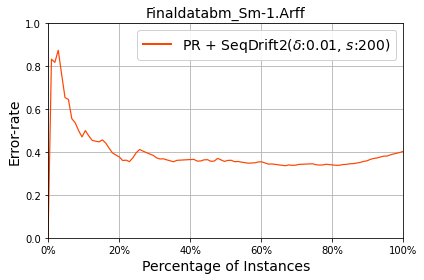

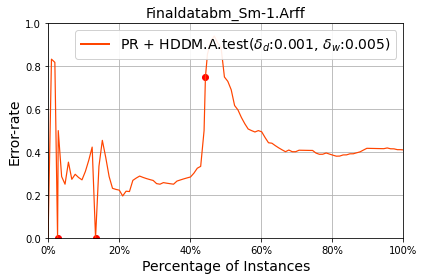

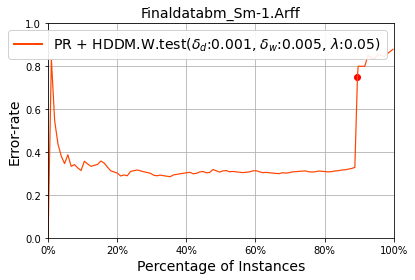

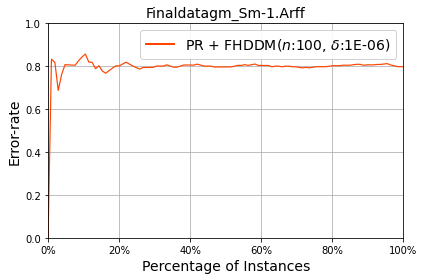

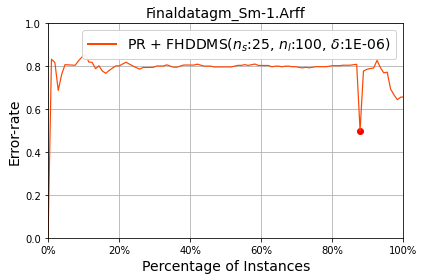

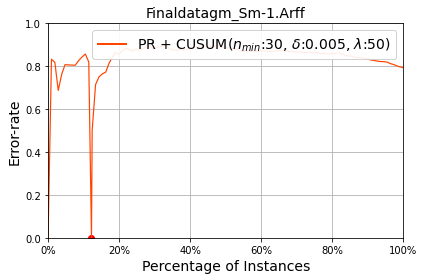

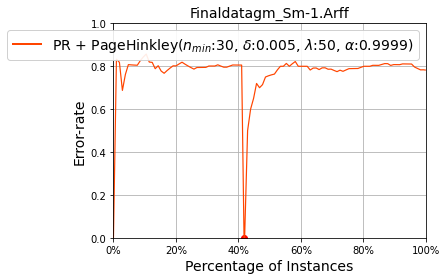

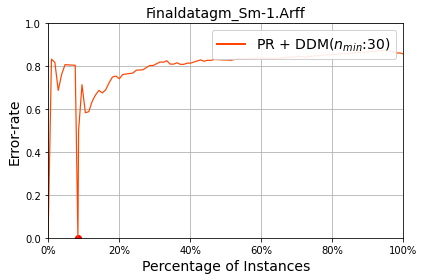

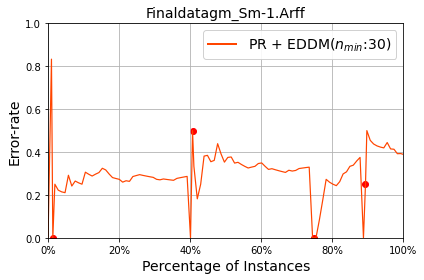

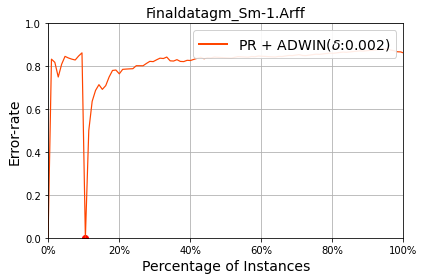

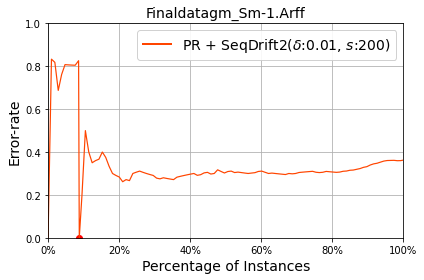

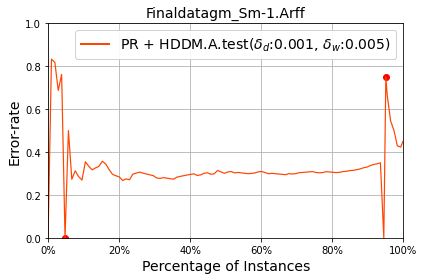

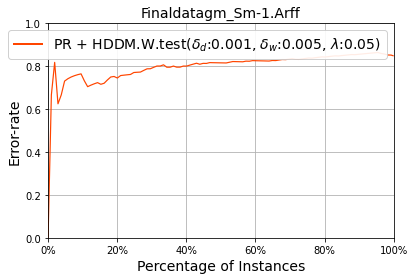

In [ ]:
from data_structures.attribute_scheme import AttributeScheme
from classifier.__init__ import *
from drift_detection.__init__ import *

from filters.project_creator import Project
from streams.readers.arff_reader import ARFFReader
from tasks.__init__ import *

import os

detectors = [FHDDM(), FHDDMS(), CUSUM(), PH(), DDM(), EDDM(),
             ADWINChangeDetector(), SeqDrift2ChangeDetector(),
             HDDM_A_test(), HDDM_W_test()
            ]
datasets = ["data_streams/metabolomites-20210808/FinalDataBM_gender-1.arff",
            "data_streams/metabolomites-20210808/FinalDataGM_gender-1.arff",
            "data_streams/metabolomites-20210808/FinalDataBM_bcp-1.arff",
            "data_streams/metabolomites-20210808/FinalDataGM_bcp-1.arff",
            "data_streams/metabolomites-20210808/FinalDataBM_sm-1.arff",
            "data_streams/metabolomites-20210808/FinalDataGM_sm-1.arff"]





for dataset in datasets:
  # 1. Creating a project
  # This is a directory, where the output images adn error rates are stored.
  project = Project("projects/single", os.path.basename(dataset).lower())
  for detector in detectors:
    # 2. Loading arff files for both datasets
    print(dataset)
    labels, attributes, stream_records = ARFFReader.read(dataset)
    attributes_scheme = AttributeScheme.get_scheme(attributes)

    learner = Perceptron(labels, attributes_scheme['numeric'])

    prequential1 = PrequentialDrift(learner, detector, attributes, attributes_scheme, project)

    prequential1.run(stream_records, random_seed=123, plot_every_nth_point=5)



# Introduction

First of all, lets talk about the tool previewed, which is used in several papers, such as [this one
](https://link.springer.com/article/10.1007/s10994-018-5719-z).

It is called Tornado framework and is available on github [here](https://github.com/alipsgh/tornado).

It is recomended to use anaconda environment, since it contains several tools for machinelearning and datascience by default. Detailed description on how to get the framework working, can be found in the [framework describtion](https://github.com/alipsgh/tornado#readme)

If you dont want to use Anaconda, just make sure to have **numpy**, **scipy**, **pympler** and **matplotlib** installed.



## Installation Notes

First you have to download the Tornado framework from their github.
For the best experience, create a virtual environment with Python 3.6+ by executing following commands in the root directory of the framework. 
This step is important, since the framework is not written as a fully contained module that could be reference from outside.


```
cd "tornado/framework/directory"
python -m venv venv
source venv/bin/activate  # to enter the environment
```

After creating the environment, install jupyter, enable extension for google collab and start a notebook server with following commands

```
pip install jupyter
jupyter serverextension enable --py jupyter_http_over_ws
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8898 --NotebookApp.port_retries=0
```
After you have done this, you should be able to see a terminal message telling you that you can connect to the jupyter server through a localhost link. 

Use that link to connect to a local runtime in the google collab and you are good to go!


In [ ]:
! pip install numpy
! pip install scipy
! pip install pympler
! pip install matplotlib

##Small demo

To showcase some of the functionality, a prequential analysis is performed below. The procedure and data are available as a part of the framework.

The run compares concept drift detection capabilities of multiple (detector, learner) pairs on a sythetic dataset, with known drift points. As part of the framework, a simple visualsation is availbale.

For users not familiar with the framework, it is better to start with more simple examples to make sense of the output. Some more example runs are showcase after the following demo too.


The project path "projects/multi/metabolomites/bm-gender/20210808_171802/" is created.
['0', '1'] PLS
100.00% of instances are processed!PR + FHDDM [0.4295, 145.64, 191.51320756645873] [30, [0, 0], 1, 4, 1.768, 1.479213300626725]
PR + FHDDMS [0.4788, 145.608, 158.3057614043355] [30, [0, 0], 2, 4, 1.944, 3.123462258372456]
PR + CUSUM [0.5228, 145.512, 319.18412190862] [30, [0, 0], 0, 4, 0.896, 2.5541698560118675]
PR + PageHinkley [0.4506, 145.512, 318.09691415401176] [30, [0, 0], 0, 4, 0.976, 2.0082303090021014]
PR + DDM [0.4442, 145.64, 243.30484052188694] [30, [0, 0], 2, 4, 0.92, 2.008536132052541]
PR + EDDM [0.2273, 145.64, 18.206048931460828] [18, [209, 2], 4, 2, 1.448, 0.05306705133989453]
PR + ADWIN [0.4817, 145.64, 183.3875920274295] [30, [0, 0], 1, 4, 6.04, 7.076948997564614]
PR + SeqDrift2 [0.456, 145.512, 75.83787955809385] [30, [0, 0], 1, 4, 10.408, 1.0905452654697]
PR + HDDM.A.test [0.5235, 145.608, 104.12604693556204] [30, [0, 0], 12, 4, 1.312, 2.271751465741545]
PR + HDDM.

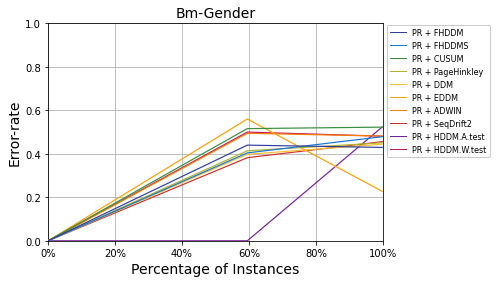

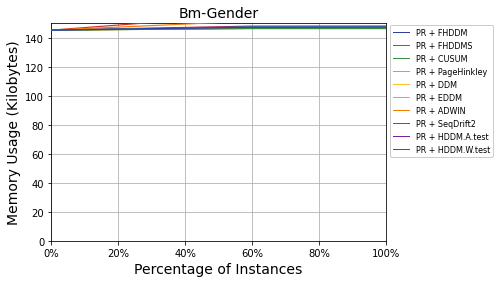

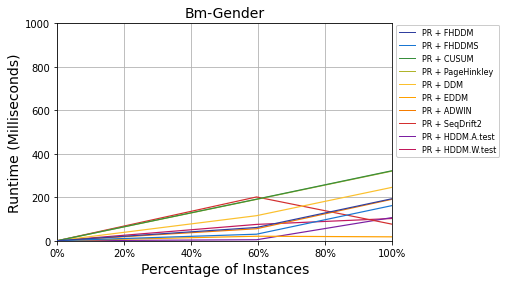

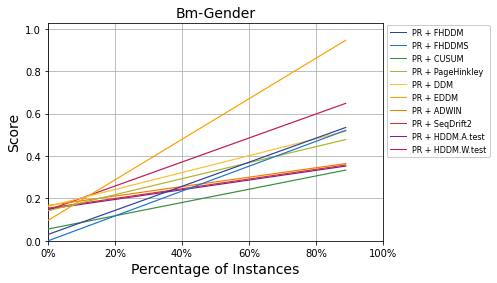

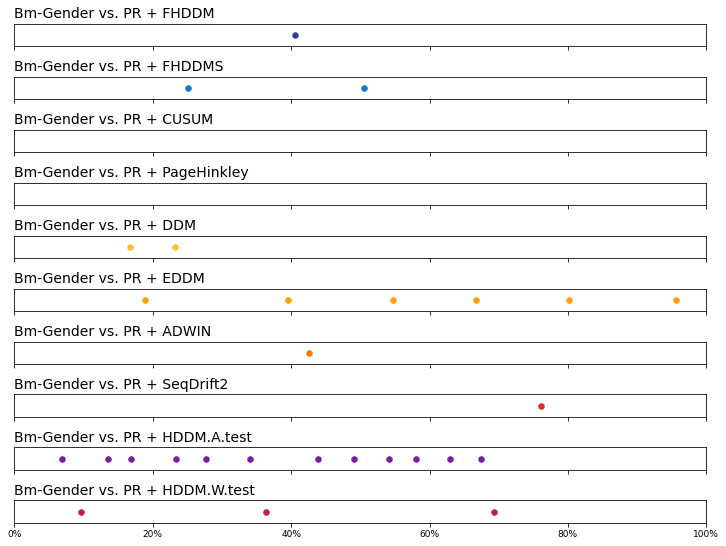

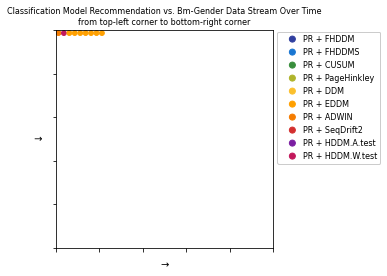

In [ ]:
"""
The Tornado Framework
By Ali Pesaranghader
University of Ottawa, Ontario, Canada
E-mail: apesaran -at- uottawa -dot- ca / alipsgh -at- gmail -dot- com
"""

from data_structures.attribute_scheme import AttributeScheme
from classifier.__init__ import *
from drift_detection.__init__ import *
from filters.project_creator import Project
from graphic.hex_colors import Color
from streams.readers.arff_reader import ARFFReader
from tasks.prequential_learner_detector_pairs import PrequentialMultiPairs

# 1. Creating a project
project = Project("projects/multi/metabolomites", "bm-gender")

# 2. Loading an arff file
labels, attributes, stream_records = ARFFReader.read("data_streams/metabolomites-20210808/FinalDataBM_gender-1.arff")
attributes_scheme = AttributeScheme.get_scheme(attributes)

print(labels, "PLS")

# 3. Initializing a Classifier-Detector Pairs
pairs = [#[NaiveBayes(labels, attributes_scheme['nominal']), FHDDM()],
         #[NaiveBayes(labels, attributes_scheme['nominal']), FHDDMS()],
         #[NaiveBayes(labels, attributes_scheme['nominal']), CUSUM()],
         #[NaiveBayes(labels, attributes_scheme['nominal']), PH()],
         #[NaiveBayes(labels, attributes_scheme['nominal']), DDM()],
         #[NaiveBayes(labels, attributes_scheme['nominal']), EDDM()],
         #[NaiveBayes(labels, attributes_scheme['nominal']), ADWINChangeDetector()],
         #[NaiveBayes(labels, attributes_scheme['nominal']), SeqDrift2ChangeDetector()],
         #[NaiveBayes(labels, attributes_scheme['nominal']), HDDM_A_test()],
         #[NaiveBayes(labels, attributes_scheme['nominal']), HDDM_W_test()],
         [Perceptron(labels, attributes_scheme['numeric']), FHDDM()],
         [Perceptron(labels, attributes_scheme['numeric']), FHDDMS()],
         [Perceptron(labels, attributes_scheme['numeric']), CUSUM()],
         [Perceptron(labels, attributes_scheme['numeric']), PH()],
         [Perceptron(labels, attributes_scheme['numeric']), DDM()],
         [Perceptron(labels, attributes_scheme['numeric']), EDDM()],
         [Perceptron(labels, attributes_scheme['numeric']), ADWINChangeDetector()],
         [Perceptron(labels, attributes_scheme['numeric']), SeqDrift2ChangeDetector()],
         [Perceptron(labels, attributes_scheme['numeric']), HDDM_A_test()],
         [Perceptron(labels, attributes_scheme['numeric']), HDDM_W_test()],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), FHDDM()],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), FHDDMS()],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), CUSUM()],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), PH()],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), DDM()],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), EDDM()],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), ADWINChangeDetector()],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), SeqDrift2ChangeDetector()],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), HDDM_A_test()],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), HDDM_W_test()]
        ]

# 4. Creating a color set for plotting results
colors = [Color.Indigo[1], Color.Blue[1], Color.Green[1], Color.Lime[1], Color.Yellow[1],
          Color.Amber[1], Color.Orange[1], Color.Red[1], Color.Purple[1], Color.Pink[1],
          Color.Indigo[2], Color.Blue[2], Color.Green[2], Color.Lime[2], Color.Yellow[2],
          Color.Amber[2], Color.Orange[2], Color.Red[2], Color.Purple[2], Color.Pink[2],
          #Color.Indigo[3], Color.Blue[3], Color.Green[3], Color.Lime[3], Color.Yellow[3],
          #Color.Amber[3], Color.Orange[3], Color.Red[3], Color.Purple[3], Color.Pink[3]
         ]

# 5. Defining actual locations of drifts, acceptance delay interval, and vector of weights
actual_drift_points = [0, 50, 100, 200]
drift_acceptance_interval = 10
w_vec = [1, 1, 1, 1, 1, 1]

# 6. Creating a Prequential Evaluation Process
prequential = PrequentialMultiPairs(pairs, attributes, attributes_scheme,
                                    actual_drift_points, drift_acceptance_interval,
                                    w_vec, project, color_set=colors, legend_param=False)

prequential.run(stream_records, 1)

#Overview

The framework was maintained by Ali Pesaranghader and some people he worked with on his papers on incremental learning and concept drift detection.

I highly recommend checking his [github page](https://alipsgh.github.io/), he is quite an interesting person.

Last major changes were made as far as two years ago.
That was the year, when Ali published his paper on the stacked FHDDM detectors and the framework hasn't been touched since.

#Common part

To save space, data are prepared here for the methods showcase. The will be reused throughout the notebook from now on.
Some of the methods are also imported here so we dont have to do it later.

## Configuration
In total, there are not many classifier implementations in the framework. You can choose from HoeffdingTree, Perceptron, NaiveBayes, KNN and DecisionStump. 

There is a superclass for a classifier, so extending the framework should not be too much of a problem.

In this notebook, the **perceptron** implementation will be used as a base learner, since the datasets used consist mostly from numerical data, or data that is more easily converted to numerical data.

The perceptron (and any other classifier implemented in the framework) has to have the attributes to expect and the target class labels specified.


In [ ]:
# peek into the datasets
print(stream_records_sea[:10])
print(labels_sea)
print([a.NAME for a in attributes_scheme['numeric']])

[[7.308782, 4.100808, 2.077148, '1'], [6.588672, 7.107396, 1.527362, '1'], [9.398654, 9.471949, 9.370821, '1'], [9.139629, 1.593396, 3.690026, '1'], [1.159671, 7.705359, 6.598927, '1'], [7.616747, 6.239725, 8.79263, '1'], [8.052278, 0.050252, 5.231352, '0'], [7.0501, 2.750299, 0.753878, '1'], [5.771003, 2.049135, 6.233638, '0'], [0.012986, 6.835265, 4.862596, '0']]
['0', '1']
["'Concentration of chylomicrons and extremely large  particles'", "'Total lipids  chylomicrons and extremely large '", "'Phospholipids  chylomicrons and extremely large '", "'Total cholesterol  chylomicrons and extremely large '", "'Cholesterol esters  chylomicrons and extremely large '", "'Free cholesterol  chylomicrons and extremely large '", "'Triglycerides  chylomicrons and extremely large '", "'Concentration of very large  particles'", "'Total lipids  very large '", "'Phospholipids  very large '", "'Total cholesterol  very large '", "'Cholesterol esters  very large '", "'Free cholesterol  very large '", "'Tr

The framework performs a naive preprocessing by itself. It discretizes numeric attributes by values and converts nominal values into ordinal labels.

This is not the optimal behaviour, so for better results, it is highly recommended to preprocess the data for any particular method first.

I have used datasets [airlines](https://www.openml.org/d/1169) which I have manually binarized with one-hot encoding into fully numerical data (except the binary nominal class, of course) and also the datasets [sea_a](https://github.com/scikit-multiflow/streaming-datasets/blob/master/sea_a.csv) and [agr_a](https://github.com/scikit-multiflow/streaming-datasets/blob/master/agr_a.csv) which I have converted from CSV into ARFF. The latte twor datasets are there for control purpose, since they are synthetic datasets and we can check whether the algorithms really detect the drifts that are there.

# Stacked Fast Hoeffding Driff Detection Method
Link to the tool: https://github.com/alipsgh/tornado/blob/master/drift_detection/fhddms.py

Documentation:

There is no real documentation except the papers cited in the [readme](https://github.com/alipsgh/tornado#readme).
<br>
Paper reference: https://doi.org/10.1007/978-3-319-46307-0_22



## Description


This method consists of stacking several FHDDM drift detectors on top of each other, offset by one on the evaluated data stream.

The Fast Hoeffding Drift Detection Method (FHDDM) which is based on a sliding window mechanism and the Hoeffding inequality. The FHDDM algorithm slides a window of size n over the classification results.

The Stacking Hoeffding Drift Detection Method (FHDDMS) extends the FHDDM method by maintaining windows of different sizes. That is, a short and a long sliding windows are superimposed. The rationale behind this approach is to reduce the detection delay and false negative rate. Intuitively, a short window should detect abrupt drifts faster, while a long window should detect gradual drifts with a lower false negative rate.

### Parameters

Main parameters are **n** (lenght of the long window for the error rate), **m** (length of the short window) and **delta** (parametrizes the Hoeffding's bound equation)

Default values are **n**=25, **m**=4, **delta**=0.000001

## Running examples

Let's see how the method performs on the first synthetic dataset generated by the SEAGenerator.

There should be one gradual drift present across the whole stream.

### Sea dataset

100.00% of instances are prequentially processed!
The stream is completely processed.
PR + FHDDMS: 
	Classifier Error-rate: 10.99%
	Classifier Average Memory Usage (bytes): 7776.00
	Classifier Average Runtime (ms): 17519.92
	Classifier Total Runtime (ms): 37728.84
	Average Detection Memory Usage (bytes): 1944.00,
	Average Detection Runtime (ms): 6979.55,
	Total Detection Runtime (ms): 15026.08,
	Error-rate: 10.99
	Drift Points detected: [750275, 928485]
THE END!



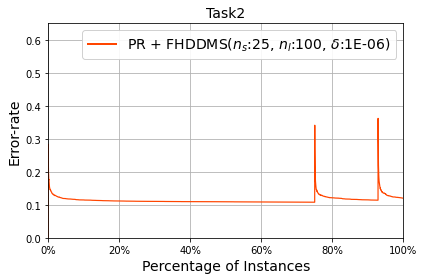

In [ ]:
# Initializing a drift detector
fhddms = FHDDMS_add()
learner = Perceptron(labels, attributes_scheme['numeric'])


prequential1 = PrequentialDrift(learner, fhddms, attributes, attributes_scheme, project)

prequential1.run(stream_records, random_seed=123)

As we can see, only two points were considered as driftpoints. Lets evaluate some other examples before jumping to conclusions. But it tookk really long to detect anything, probably due to the perceptron being able to adapt dynamically to the the introduced changes.

Below is another synthetic dataset. As usual, the commentary in the scikit-multiflow states, that the dataset contain 3 abrupt changes. Let's see if we can find them

### Agr dataset

100.00% of instances are prequentially processed!
The stream is completely processed.
PR + FHDDMS: 
	Classifier Error-rate: 39.27%
	Classifier Average Memory Usage (bytes): 24936.00
	Classifier Average Runtime (ms): 13495.27
	Classifier Total Runtime (ms): 145037.78
	Average Detection Memory Usage (bytes): 825496.00,
	Average Detection Runtime (ms): 4721.26,
	Total Detection Runtime (ms): 42704.70,
	Error-rate: 39.27
	Drift Points detected: [101625, 202692, 304289, 406386, 506575, 608061, 708387, 812208, 915480]
THE END!



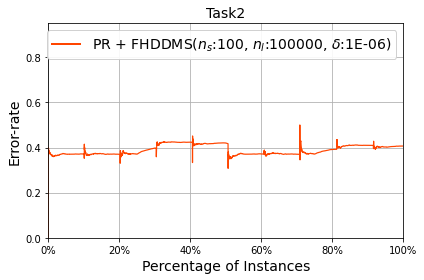

In [ ]:
# Initializing a drift detector
fhddms = FHDDMS(m=1000, n=100)
learner = Perceptron(labels_agr, attributes_scheme_agr['numeric'])

prequential1_1 = PrequentialDrift(learner, fhddms, attributes_agr, attributes_scheme_agr, project)

prequential1_1.run(stream_records_agr, random_seed=123)



Below is the same detector evaluation for the real-world dataset, **airlines**. Lets see, how the detectors behave on such complex dataset.

100.00% of instances are prequentially processed!
The stream is completely processed.
PR + FHDDMS: 
	Classifier Error-rate: 32.77%
	Classifier Average Memory Usage (bytes): 329928.00
	Classifier Average Runtime (ms): 10563.82
	Classifier Total Runtime (ms): 916759.69
	Average Detection Memory Usage (bytes): 44072.00,
	Average Detection Runtime (ms): 301.77,
	Total Detection Runtime (ms): 25967.51,
	Error-rate: 32.77
	Drift Points detected: [6150, 12307, 21078, 27467, 33291, 39580, 45541, 51173, 57647, 66183, 72264, 78149, 86619, 93821, 99637, 108063, 113104, 118850, 124381, 130197, 136623, 143888, 149146, 155466, 161492, 167589, 173072, 180031, 186846, 193549, 200172, 205412, 211055, 216513, 223326, 230002, 236051, 241409, 246478, 252733, 257885, 264268, 270227, 275469, 281854, 286975, 292282, 298087, 303703, 310059, 315815, 321652, 327659, 335089, 342069, 348066, 353372, 359194, 365028, 370974, 376294, 381676, 387703, 393331, 398748, 406049, 412570, 419646, 428289, 434793, 442487, 450

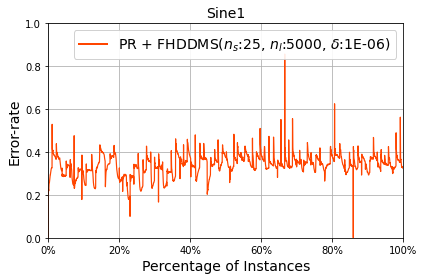

In [ ]:
fhddms = FHDDMS(m=200)  # reset the detector for the next experiment
learner = Perceptron(labels_air, attributes_scheme_air['numeric'])

prequential2 = PrequentialDrift(learner, fhddms, attributes_air, attributes_scheme_air, project)

prequential2.run(stream_records_air, random_seed=123)

Let's now change the parameters a little and change the implementation slightly.

The following implementation is not too differend from the previous one, but uses additive sampling, so the execution time is faster, but the detection can be delayed.

With larger parameters, the drift detection should be less prone to false positives, thus detecting less driftpoints.

### Airlines dataset

100.00% of instances are prequentially processed!
The stream is completely processed.
PR + FHDDMS.add: 
	Classifier Error-rate: 32.69%
	Classifier Average Memory Usage (bytes): 329928.00
	Classifier Average Runtime (ms): 126902.36
	Classifier Total Runtime (ms): 2872912.34
	Average Detection Memory Usage (bytes): 2784.00,
	Average Detection Runtime (ms): 331.08,
	Total Detection Runtime (ms): 2831.39,
	Error-rate: 32.69
	Drift Points detected: [58000, 124001, 179002, 240003, 299004, 371005, 455006, 506007]
THE END!



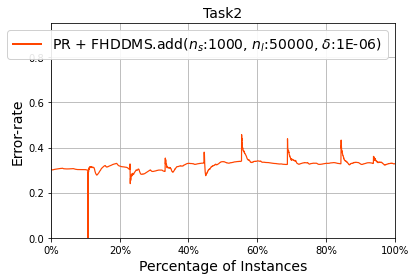

In [ ]:
from drift_detection.fhddms_add import FHDDMS_add
# Initializing a new drift detector with changed parameters
fhddmsa = FHDDMS_add(n=1000, m=50)
learner = Perceptron(labels_air, attributes_scheme_air['numeric'])

prequential3 = PrequentialDrift(learner, fhddmsa, attributes_air, attributes_scheme_air, project)

prequential3.run(stream_records_air, random_seed=123)

## Discussion

It is clear that for the **airlines** dataset the detector is throwing drifts everywhere. This might be due to several factors, one of them is too sensitively set parameters, second is that the drift happens too often.

Real world datasets are often hard, especialyl in a setting as the airline delay. There are many interational dependencied in the flight scheduling and thus the dataset is itself very hard for simple learners such as the perceptron that is used here.

When the prarmeters are adjusted, the sensitivity to changes in the distribution is lower, which results in lower detection points.

It would be probably more interesting to use something like neural networks or deep forests to gain some accuracy first, before trying to find concept drift with a learner that does not classify well in the first place.

# SeqDrift2
Link to the tool: https://github.com/alipsgh/tornado/blob/master/drift_detection/seq_drift2.py
<br>
Documentation: see the source paper
<br>
Paper reference: https://link.springer.com/article/10.1007/s10994-013-5433-9


## Description

In the original SeqDrift, the change detection problem is approached as testing the null hypothesis **H0** that **μ1 = μ2** that the two samples are drawn from
the same distribution versus the alternate hypothesis H1 that they arrive from different distributions with **μ1 != μ2**. In practice the underlying data distribution is unknown and a test statistic based on the sample means is constructed by the change
detector.

**SeqDrift2** is an extended version of SeqDrift1 proposed by Sakthithasan et al. (2013) that uses the same basic sequential hypothesis testing strategy but contains a
number of important enhancements, including the use of reservoir sampling for memory management and the use of a much tighter bound for the cut threshold.




### Parameters

SeqDrift requires two parameters to operate. First one is the **delta** (1-delta sets the confidence interval) and **block size** (size of the sample ranges for distribution comparison)

Default values are **delta=0.01** and **block_size=200**. The authors suggest a minimal block size of 200, stating that with the default block size of 200, the normality distribution assumption holds well and the variance can be reliably estimated from the samples.
The explanation is a little more complex and for a better understanding I suggest reading the source paper.

## Running examples

Again, start with the **sea** dataset, and continue to the latter two.

###Sea dataset

100.00% of instances are prequentially processed!
The stream is completely processed.
PR + SeqDrift2: 
	Classifier Error-rate: 10.74%
	Classifier Average Memory Usage (bytes): 7744.00
	Classifier Average Runtime (ms): 36987.00
	Classifier Total Runtime (ms): 36987.00
	Average Detection Memory Usage (bytes): 17738840.00,
	Average Detection Runtime (ms): 12645.85,
	Total Detection Runtime (ms): 12645.85,
	Error-rate: 10.74
	Drift Points detected: []
THE END!



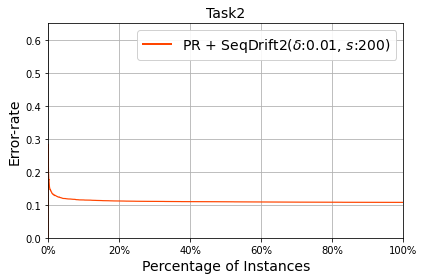

In [ ]:
# Initializing a drift detector
sdcd = SeqDrift2ChangeDetector(block_size=300)
learner = Perceptron(labels_sea, attributes_scheme_sea['numeric'])

prequential4 = PrequentialDrift(learner, sdcd, attributes_sea, attributes_scheme_sea, project)

prequential4.run(stream_records_sea, random_seed=123)


As you can see, the **sea** dataset went through the SeqDrift2 without any drift detected. This should have the same explanation as in the case of FHDDMS, but with an additional note, that SeqDrift2 is probably less sensitive to gradual changes.



### Agr dataset

100.00% of instances are prequentially processed!
The stream is completely processed.
PR + SeqDrift2: 
	Classifier Error-rate: 39.25%
	Classifier Average Memory Usage (bytes): 24936.00
	Classifier Average Runtime (ms): 6965.40
	Classifier Total Runtime (ms): 131579.53
	Average Detection Memory Usage (bytes): 10408.00,
	Average Detection Runtime (ms): 642.18,
	Total Detection Runtime (ms): 12666.91,
	Error-rate: 39.25
	Drift Points detected: [48201, 101602, 134803, 170604, 171805, 190606, 346007, 513608, 548209, 565410, 634811, 635412, 671813, 710014]
THE END!



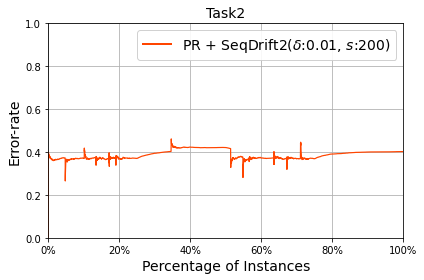

In [ ]:
# Initializing a drift detector
sdcd = SeqDrift2ChangeDetector(block_size=200)
learner = Perceptron(labels_agr, attributes_scheme_agr['numeric'])

prequential4 = PrequentialDrift(learner, sdcd, attributes_agr, attributes_scheme_agr, project)

prequential4.run(stream_records_agr, random_seed=123)

### Airlines dataset

100.00% of instances are prequentially processed!
The stream is completely processed.
PR + SeqDrift2: 
	Classifier Error-rate: 26.46%
	Classifier Average Memory Usage (bytes): 24935.26
	Classifier Average Runtime (ms): 843.02
	Classifier Total Runtime (ms): 37459.12
	Average Detection Memory Usage (bytes): 10408.00,
	Average Detection Runtime (ms): 279.91,
	Total Detection Runtime (ms): 25085.11,
	Error-rate: 26.46
	Drift Points detected: [46801, 84602, 131403, 170004, 170405, 208206, 249007, 249608, 250009, 270610, 273611, 316612, 317413, 343814, 385615, 386216, 427217, 457218, 490019, 531620, 567621, 568022, 595823, 631424, 631825, 668426, 701227, 701828, 745829, 773630, 814031, 814632, 819033, 819434, 820835, 845636, 867037, 868838, 896639, 931840, 965841, 966442, 967243]
THE END!



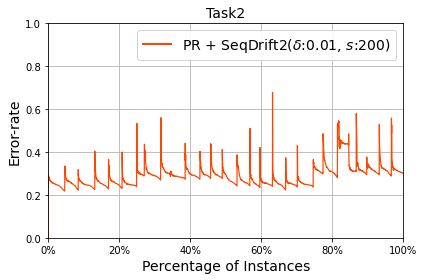

In [ ]:
# Reset the drift detector
sdcd.reset()
learner = Perceptron(labels_air, attributes_scheme_air['numeric'])

prequential5 = PrequentialDrift(learner, sdcd, attributes_air, attributes_scheme_air, project)

prequential5.run(stream_records_air, random_seed=123)

## Discussion

After going through the datasets with the detectors, it should be clear, that in the **airlines** dataset, there are changes everywhere, the distribution is really unstable in time and stable prediction accuracy is hard to maintain, at least with the simple perceptron implementation.

Detecting gradual changes with learners that adapt well is not really possible, we woud have to be in a setting, where the learner cannot adapt to the gradual concept change, or use a more sensitive detection methods to catch even the slightest changes in the distributios od errors. Because of that, the **sea** dataset did not really offer any interesting results.

For the **agr_a** dataset, if the error rates are examined closely, there are visible changes, which could be attriuted to the synthetic concept drifts, yet since I was not able to retrieve exact locations of the drifts from the original papers, we can only guess how well the drift points were detected.
If we take into account both results on the dataset, we can clearly see, that the detection points overlap frequently, and judging from the error rates we can guess the actual drift points to be at 30kth, 50kth and 80kth example. This is important for the final comparison. 

# Comparison



We can conclude, that the **SegDrift** method is less prone to false positive and overall less sensitive to small changes. If there is a gradual change, that is eventually handled by the learner itself, SeqDrift will probably not detect the change.

The **FSHDDM** method, is much more sensitive to abrupt changes, which results in a lot of false positives, if the dataset is noisy, for example.

Following run compares the showcased methods on the synthetic dataset **agr_a**.

The project path "projects/multi/sine1/20210606_230152/" is created.
100.00% of instances are processed!PR + FHDDMS.add [0.4079, 24.936, 2523.980922996998] [9000, [0, 0], 8, 3, 2.128, 103.39433699846268]
PR + SeqDrift2 [0.4045, 24.936, 31771.16233110428] [9000, [0, 0], 15, 3, 9030.4, 3637.8079876303673]
THE END



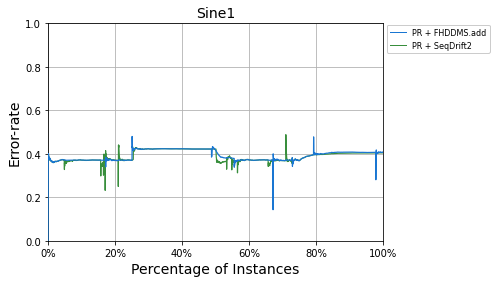

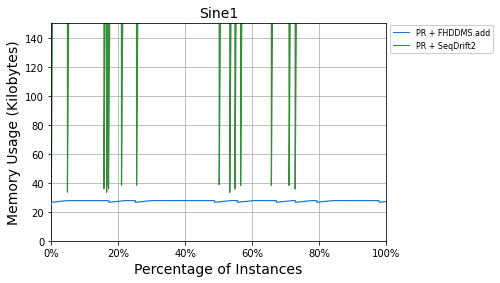

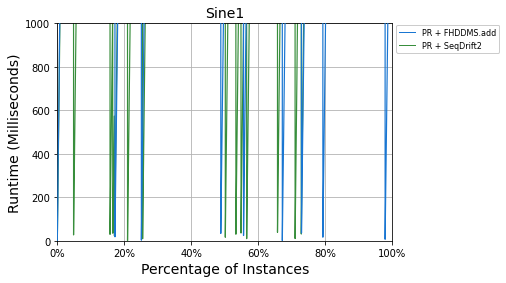

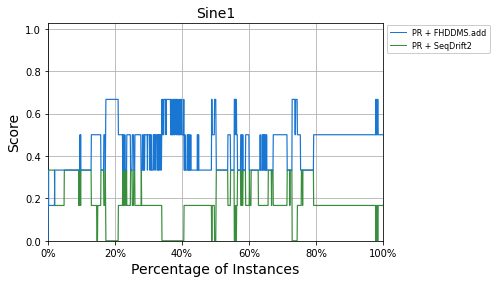

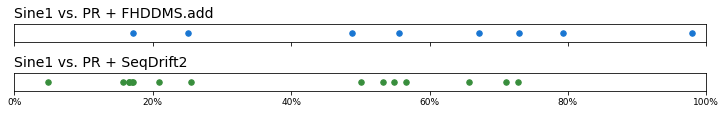

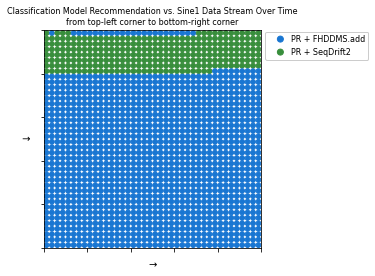

In [ ]:
from graphic.hex_colors import Color
# 1. Creating a project
project = Project("projects/multi", "sine1")

# 2. Loading an arff file
labels, attributes, stream_records = ARFFReader.read("data_streams/agr/agr_a_num.arff")
attributes_scheme = AttributeScheme.get_scheme(attributes)

# 3. Initializing a Classifier-Detector Pairs
pairs = [#[NaiveBayes(labels, attributes_scheme['nominal']), FHDDMS_add(n=1000, m=50)],
         #[NaiveBayes(labels, attributes_scheme['nominal']), SeqDrift2ChangeDetector(block_size=300)],
         [Perceptron(labels, attributes_scheme['numeric']), FHDDMS_add(n=1000, m=50)],
         [Perceptron(labels, attributes_scheme['numeric']), SeqDrift2ChangeDetector(block_size=300)],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), FHDDMS_add(n=1000, m=50)],
         #[HoeffdingTree(labels, attributes_scheme['nominal']), SeqDrift2ChangeDetector(block_size=300)]
         ]

# 4. Creating a color set for plotting results
colors = [ Color.Blue[1], Color.Green[1]#,  Color.Yellow[1],
          # Color.Orange[1], Color.Red[1], Color.Purple[1]
           ]

# 5. Defining actual locations of drifts, acceptance delay interval, and vector of weights
actual_drift_points = [ 30000, 50000, 80000]
drift_acceptance_interval = 3000
w_vec = [ 1, 1, 1, 1, 1, 1]

# 6. Creating a Prequential Evaluation Process
prequential = PrequentialMultiPairs(pairs, attributes, attributes_scheme,
                                    actual_drift_points, drift_acceptance_interval,
                                    w_vec, project, color_set=colors, legend_param=False)

prequential.run(stream_records, 1)

Comparing the **Tornado framework** to the other packages/libraries/methods of my colleagues is hard, because this framework is mostly for comparing various detection methods on data streams. The functionality is fine-tuned exclusively for research purposes and does not really offer any additional value that would make it suitable for production anywhere.
In contrast, scikit-multiflow and similar scikit-based libraries are perfectly suitable for production, since they are more task-oriented and prioritize efficiency, not user-experience and variability in algorithms.

Tornado framework is not the cutting edge library in terms of optimization, but it offers implementations of latest detection methods, which are often missing from the mainstream libraries, such us sci-kit.

To make a statement about R libraries, such as drifter or InvCorr, I would say they are really specific in their nature and usually define a specific task that they solve.